# Task 1 : Simple Linear Regression


## Importing Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## importing and reading the data

In [41]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)
data.head(15)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


## Visualising the distribution of scores

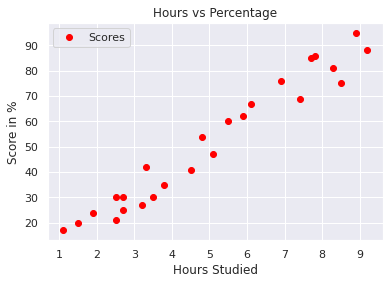

In [42]:
data.plot(x='Hours', y='Scores', style='o',c = 'red')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied' , fontweight = '20')  
plt.ylabel('Score in %',fontweight= '20')  
plt.show()

## Preprocessing the data


### 1) Preparing the data

In [43]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

### 2) Splitting the data into training set and test set

In [44]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0) 

## Training the model with the training set

In [45]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

print("Training done.")

Training done.


## Plotting the regression line and the distribution of scores

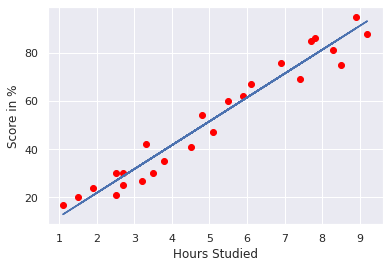

In [46]:
yhat = (regressor.coef_)*x + (regressor.intercept_)
plt.scatter(x, y , c = 'red')
plt.plot(x, yhat)
plt.xlabel('Hours Studied' , fontweight = '20')  
plt.ylabel('Score in %',fontweight= '20')  
plt.show()
plt.show()

## Making Predictions

In [47]:
ypred = regressor.predict(x_test)
print('Predictions done')

Predictions done


In [48]:
x_test 

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

### 1) Converting x_test from 2d array into 1d array

In [49]:
x_test = np.ravel(x_test)
x_test

array([1.5, 3.2, 7.4, 2.5, 5.9])

### 2) Comparing Actual output(y_test) and predicted output(ypred)

In [50]:
df = pd.DataFrame({'Hours':x_test, 'Actual': y_test, 'Predicted': ypred})  
df 

,Hours,Actual,Predicted
0,1.5,20,16.884145
1,3.2,27,33.732261
2,7.4,69,75.357018
3,2.5,30,26.794801
4,5.9,62,60.491033


### 3) Prediction with random 'Hour' value

In [51]:
hours = [[9.25]]
pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737539


## Evaluating the model performance

In [52]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, ypred)) 

Mean Absolute Error: 4.183859899002982
